
# Linear Regression: Univariate

---
This script contains examples on how to train and test a linear regression model in Python. For executing the script, you will need to download the dataset "Admission_Predict.csv".

**Note on importing libraries:**

General syntax to import specific functions in a library:
*from (library) import (specific library function)*
*from pandas import DataFrame*

General syntax to import a library but no functions:
*import (library) as (give the library a nickname/alias)*
*import matplotlib.pyplot as plt*
*import pandas as pd *

**Libraries:**

**Pandas** -- is a software library written for the Python programming language for data manipulation and analysis (dataframes, reading and writing, data alignment, reshaping, slicing, indexing, data structure insertion and deletion, merging, time series functionality etc.

**NumPy** -- is a library for Python adding support for large, multi-dimnesional arrays and matrices, along with a large collection of high-level matematical functions to operate on these arrays.


**Matplotlib** -- is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

**Seaborn** -- is a Python data visualization library based on matplotlib (It is used to create more attractive and informative statistical graphics. While seaborn is a different package, it can also be used to develop the attractiveness of matplotlib graphics).

**os** - is a module that provides easy functions allowing us to interact and get Operating System information and even control processes up to a limit.

**io** - is a module that provides the Python interfaces to stream handling.

In [69]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import io
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


In [70]:
# To make this notebook's output stable across runs (we make the output reproducable)
np.random.rand(42)

array([0.09156119, 0.27318783, 0.44517838, 0.7867733 , 0.10917562,
       0.37853045, 0.89619832, 0.58060025, 0.33865393, 0.34322888,
       0.74911326, 0.51647922, 0.42969309, 0.04892401, 0.9202777 ,
       0.43874519, 0.33538098, 0.31238546, 0.04592783, 0.35542092,
       0.505495  , 0.79463849, 0.15540598, 0.14151676, 0.41330634,
       0.86941317, 0.87651963, 0.22337448, 0.72620863, 0.21724165,
       0.06919107, 0.51010561, 0.12200735, 0.43651912, 0.50559451,
       0.54838874, 0.60423292, 0.39672911, 0.04277934, 0.50272396,
       0.05396015, 0.04155372])

In [71]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [72]:
# Let's generate some linear looking data:
# Note: numpy.random.randn generates samples from the normal distribution, while numpy.random.rand from unifrom
X = 2 * np.random.rand(100, 1)

In [73]:
y = 4 + 3 * X + np.random.randn(100, 1) # notice a difference between the function to generate X and y? The former draws from a uniform distribution and the latter from a normal distribution.

In [74]:
 print(np.c_[X, y])  # Translates slice objects to concatenation along the second axis.

[[3.02302241e-01 4.95899720e+00]
 [1.74321071e+00 8.34306115e+00]
 [1.30302881e+00 7.48243378e+00]
 [8.89652864e-01 6.32007634e+00]
 [1.05545847e+00 6.27471232e+00]
 [7.63929540e-01 5.00612419e+00]
 [7.16691538e-01 6.32912673e+00]
 [4.88750830e-01 4.75520715e+00]
 [8.45754935e-01 5.79934857e+00]
 [6.81034724e-01 5.97167425e+00]
 [1.18074723e+00 7.95612446e+00]
 [8.61583838e-01 6.66014272e+00]
 [1.41577427e-01 5.28773548e+00]
 [1.27642941e+00 8.22244222e+00]
 [1.02948219e+00 7.20811402e+00]
 [1.80678397e+00 8.42502899e+00]
 [1.68942981e+00 7.93211901e+00]
 [9.46100262e-02 6.15049559e+00]
 [1.77339881e+00 9.17408252e+00]
 [1.13910982e+00 7.58938551e+00]
 [1.90734400e+00 1.14221958e+01]
 [1.83304426e-01 4.67426656e+00]
 [1.23494100e+00 8.38239976e+00]
 [1.71802845e+00 8.43278925e+00]
 [1.15354234e+00 8.02534406e+00]
 [1.37911992e+00 1.11014016e+01]
 [7.31113243e-01 4.96399668e+00]
 [9.05945377e-01 8.07933129e+00]
 [1.71407491e+00 7.48640921e+00]
 [9.35211856e-01 5.59367670e+00]
 [3.223802

(0.0, 2.0, 0.0, 12.0)

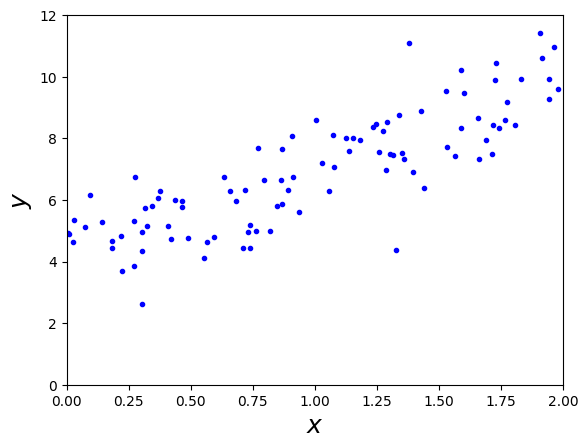

In [75]:
# Let's plot (info on the marker and the color --> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([0, 2, 0, 12])

In [76]:
# Training a linear model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # create an object for the linear regression
lin_reg.fit(X, y) # fit the data
Y_predict = lin_reg.predict(X)


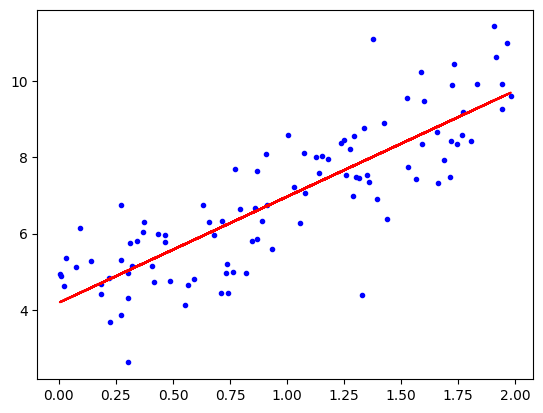

In [77]:
plt.plot(X, y, "b.")
plt.plot(X, Y_predict, color='red')
plt.show()

In [78]:
X_new = np.array([[0.5], [1.75]])
y_predict = lin_reg.predict(X_new)
y_predict

array([[5.57875635],
       [9.04792292]])

**Let's try with real data**

---

Read CSV file = banking.csv

In [79]:
banking_url = "https://raw.githubusercontent.com/umatter/EDFB/main/data/banking.csv"
print("Fetching banking.csv from GitHub...")

Fetching banking.csv from GitHub...


In [80]:
dataset = pd.read_csv(banking_url)

In [81]:
dataset.head()

,age,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,married,basic.4y,yes,no,cellular,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,married,unknown,no,no,cellular,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,single,university.degree,yes,no,cellular,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,married,high.school,no,no,cellular,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,married,basic.4y,yes,no,cellular,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [82]:
dataset.tail()

,age,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,married,high.school,no,yes,telephone,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,married,basic.4y,no,no,telephone,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,single,university.degree,yes,yes,telephone,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,married,professional.course,no,yes,telephone,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,single,high.school,no,no,telephone,112,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [83]:
dataset.shape # Returns the dimensions of the array.

(41188, 17)

In [84]:
dataset.dtypes # Returns the dtypes in the DataFrame.

age                 int64
marital            object
education          object
housing            object
loan               object
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [85]:
# Check for NAS
dataset.isna().any() # Generate a boolean mask indicating missing values

age               False
marital           False
education         False
housing           False
loan              False
contact           False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [86]:
dataset.isna().sum()

age               0
marital           0
education         0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [87]:
# Describe the data
dataset.describe()

print(dataset.columns)

Index(['age', 'marital', 'education', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [88]:
# Select the target and independent variables
# Convert 'loan' column to numerical using one-hot encoding
X_df = pd.get_dummies(dataset['loan'], prefix='loan')  # keep as DataFrame to preserve column names
X = X_df.values
y = dataset['age'].values.reshape(-1,1)
# Choose one feature for visualization (prefer 'loan_yes' if present)
viz_col = 'loan_yes' if 'loan_yes' in X_df.columns else X_df.columns[0]
viz_idx = list(X_df.columns).index(viz_col)

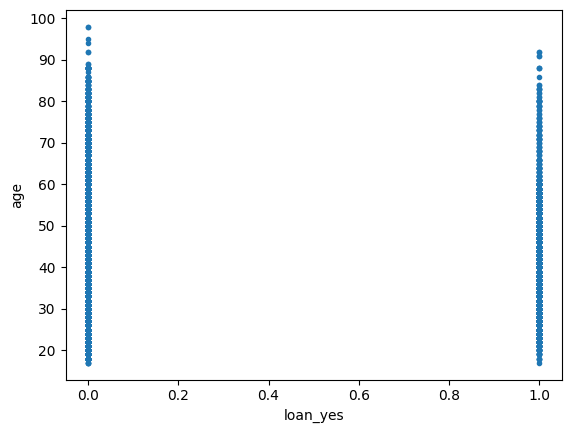

In [89]:
# Scatter plot
plt.scatter(X_df[viz_col].values, y.ravel(), marker='.')
plt.xlabel(viz_col)
plt.ylabel('age')
plt.show()

In [90]:
# Remove non-numeric vars and check the correlations
corrmat = dataset.drop(['marital', 'education', 'housing', 'loan', 'contact', 'poutcome'], axis=1).corr()
corrmat

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


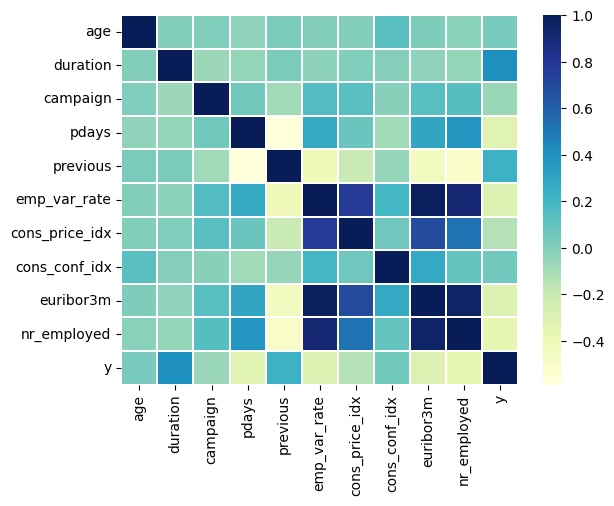

In [91]:
# Plot correlation heatmap
sns.heatmap(corrmat, cmap ="YlGnBu", linewidths=0.1)
# sns.heatmap(corrmat, cmap="Blues")
# sns.heatmap(corrmat, cmap="BuPu")
# sns.heatmap(corrmat, cmap="Greens")
plt.show()

In [92]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% in testing; we set random_state, as everytime you run it without specifying random_state, you will get a different result
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 3)
(8238, 3)
(32950, 1)
(8238, 1)


In [93]:
# Fit the model on training set
model = LinearRegression()
model.fit(X_train, y_train) # training the algorithm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
# Get coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)
print('\nThe fitted model is y=', round(model.coef_[0][0], 2), '* x +', round(model.intercept_[0], 2))

Intercept: [39.97505997]
Slope: [[ 0.07631543 -0.10728077  0.03096533]]

The fitted model is y= 0.08 * x + 39.98


In [95]:
# Get fitted value on test set
y_test_predicted = model.predict(X_test)

# Compare predictions
pd.DataFrame({'True': y_test.flatten(), 'Predicted': y_test_predicted.flatten()}) # .flatten --> collapses an array into one dimension

,True,Predicted
0,51,40.051375
1,31,40.051375
2,33,40.051375
3,29,40.051375
4,57,40.051375
...,...,...
8233,47,40.051375
8234,38,40.051375
8235,57,40.051375
8236,31,39.867779


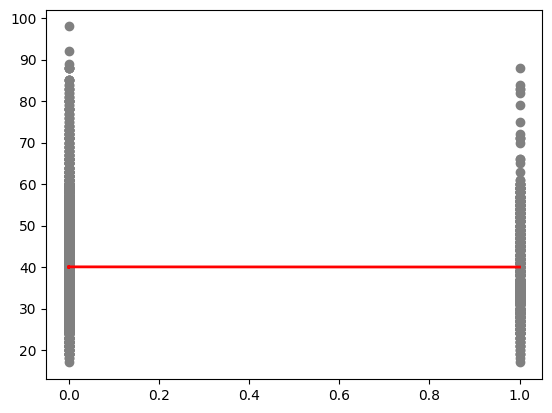

In [96]:
# Plot model
x_plot = X_test[:, viz_idx].ravel()
y_true = y_test.ravel()
y_pred_flat = y_test_predicted.ravel()
order = np.argsort(x_plot)
plt.scatter(x_plot, y_true, color='gray')
plt.plot(x_plot[order], y_pred_flat[order], color='red', linewidth=2)
plt.show()

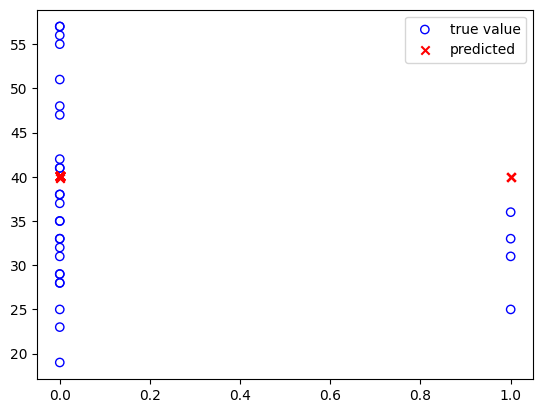

In [97]:
# Plot some predicted vs true values
points_to_plot=30
x_subset = X_test[:points_to_plot, viz_idx]
plt.scatter(x_subset, y_test[:points_to_plot],  color='blue', marker='o', facecolors='none', label='true value')
plt.scatter(x_subset, y_test_predicted[:points_to_plot],  color='red', marker='x', label='predicted')
plt.legend()
plt.show()

In [98]:
# Evaluate Root Mean Square Error (RMSE)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted))
print('Root Mean Squared Error on test set:', RMSE_test)
print('Mean of y_test:', y_test.mean())

Root Mean Squared Error on test set: 10.438477269807082
Mean of y_test: 39.95957756737072


In [99]:
# Evaluate R-squared
R2 = metrics.r2_score(y_test, y_test_predicted)
print('R-squared:', R2)


R-squared: 1.8648734756432361e-07


**Linear regression for forecasting**

---

In this next section, we aim to train a linear model that will predict the Close price of the Bitcoin cryptocurrency.

In [100]:
# Let's import the dataset including Bitcoin prices
btc_url = "https://raw.githubusercontent.com/umatter/EDFB/main/data/data_BTC.csv"
print("Fetching data_BTC.csv from GitHub...")

Fetching data_BTC.csv from GitHub...


In [101]:
try:
    data = pd.read_csv(btc_url)
except Exception as e:
    print("Falling back to KaggleHub dataset nguynchtrai/data-btc due to:", repr(e))
    try:
        import kagglehub
    except Exception:
        import sys, subprocess
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "kagglehub"])  # install if missing
        import kagglehub
    path = kagglehub.dataset_download("nguynchtrai/data-btc")
    import os, glob
    candidates = sorted(glob.glob(os.path.join(path, "*.csv")))
    if not candidates:
        raise RuntimeError("No CSV files found in Kaggle dataset directory: " + path)
    print("Loaded from:", candidates[0])
    data = pd.read_csv(candidates[0])

Falling back to KaggleHub dataset nguynchtrai/data-btc due to: <HTTPError 404: 'Not Found'>


/home/umatter/.pyenv/versions/3.11.7/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.90M/3.90M [00:24<00:00, 167kB/s]

Extracting files...
Loaded from: /home/umatter/.cache/kagglehub/datasets/nguynchtrai/data-btc/versions/1/BTC_USDT_data_1.csv


In [102]:
# Let's check if we imported correctly
data.head()

,Timestamp,Open,High,Low,Close,Volume
0,1552611600000,3884.75,3893.86,3881.37,3890.42,795.061454
1,1552615200000,3889.67,3892.00,3885.90,3887.31,541.767119
2,1552618800000,3886.82,3888.17,3877.60,3882.90,591.283229
3,1552622400000,3882.88,3889.00,3881.36,3887.00,619.588434
4,1552626000000,3887.64,3892.00,3887.00,3890.85,726.280333


In [103]:
# Let's get some summary stats on the prices
data.describe()

,Timestamp,Open,High,Low,Close,Volume
count,4.400000e+04,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000
mean,1.632199e+12,26769.369488,26898.734263,26632.757460,26770.763707,3593.672887
std,4.595319e+10,16697.320449,16787.096219,16602.320109,16698.146863,4709.856405
min,1.552612e+12,3879.970000,3888.170000,3782.130000,3879.850000,0.000000
25%,1.592404e+12,10373.450000,10417.615000,10329.647500,10373.492500,1170.493952
50%,1.632204e+12,24529.545000,24627.560000,24416.290000,24533.780000,2027.721827
75%,1.671989e+12,39504.120000,39736.365000,39291.232500,39505.282500,4000.920433
max,1.711782e+12,73577.350000,73777.000000,73215.140000,73577.350000,137207.188600


In [104]:
# Let's plot the movement of the BTC Close Price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['BTC-USD.Close'], label='Bitcoin Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.legend()


KeyError: 'Date'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# We can use a linear model to forecast (predict) the close price of the Bitcoin at t+1 by using certain amount of lagged prices.
# So let's create lag features. Specifically, we are defining a function to create the lag values.
def create_lagged_features(data, lag):
    for i in range(1, lag+1):
        data[f'lag_{i}'] = data['BTC-USD.Close'].shift(i)
    data.dropna(inplace=True)
    return data

In [ ]:
# Create lag features with a lag of 20 days
data = create_lagged_features(data, lag=20)

In [ ]:
data.head()

In [ ]:
# Split the data into training and testing sets. Remember: We never use the full dataset for training. We always split the data and use portion for training and portion for testing.
X = data.drop(['Date','BTC-USD.Close'], axis=1)
y = data['BTC-USD.Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary, which includes coefficients and p-values
print(model.summary())

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the r2
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error on Test Set: {rmse:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")

In [ ]:
for true, predicted in zip(y_test, y_pred):
    print(f"True: {true:.2f}, Predicted: {predicted:.2f}")

In [ ]:
# Let's plot
plt.scatter(X_test.iloc[:, 0], y_test,  color='blue', marker='o', facecolors='none', label='true value')
plt.scatter(X_test.iloc[:, 0], y_pred,  color='red', marker='x', label='predicted')
plt.legend()
plt.show()

**Linear regression assumes the following:**

---



1. **linear relationship** between regressor(s) and target
2. little or **no multicollinearity** between regressors
3. **homoscedasticity**, i.e. the variance of the error terms (i.e. residuals) doesn't vary too much for all observations
4. **normal distribution of error terms** (i.e. residuals)
5. no correlation between regressors and residuals or little or **no autocorrelation in residuals** for time series, i.e. correlation between  𝑒𝑡  and  𝑒𝑡−1

In [ ]:
# Checking Assumption 1 - linear relationship between regressors and target
# Scatter plot of Y vs x (using selected visualization feature)

plt.scatter(X_df[viz_col].values, y.ravel(), marker='o')
plt.title('Loan (feature) vs Age (target)')
plt.xlabel(viz_col)
plt.ylabel('age')
plt.show()

*Checking Assumption 2 - little to no multicolinearity between regressors *

There is only 1 regressor in a univeriate regression!

In [ ]:
# Checking Assumption 3 - Homoscedasticity
# Plot the residual and check their "shape"
residuals_test = y_test - y_test_predicted
plt.figure(figsize=(20,10))
plt.scatter(np.arange(0,len(residuals_test)), residuals_test, marker='o', facecolors='none', color='black', alpha=0.5)
plt.show()

In [ ]:
# Checking Assumption 4 - Normal distribution of residuals
# Check if residual distribution looks like a normal distribution with same mean and variance

resid_mean = residuals_test.mean()
resid_std = residuals_test.std()
normal_distr = np.random.normal(resid_mean, resid_std, len(residuals_test))

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,10))
sns.distplot(residuals_test, ax=ax[0])
ax[0].set_title('Residual distribution', fontsize=20)
sns.distplot(normal_distr, ax=ax[1])
ax[1].set_title('Normal distribution', fontsize=20)
sns.distplot(residuals_test, label='residuals', ax=ax[2])
sns.distplot(normal_distr, label='normal\ndistribution', ax=ax[2])
ax[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

In [ ]:
# Check QQ-plot, i.e. plotting the quantiles of residual against quantiles of normal distribution

percentile_set = np.linspace(0,100,10000) # set percentile 1%, 2%, 3%, etc
residual_percentile = np.percentile(residuals_test, percentile_set)
normal_percentile = np.percentile(normal_distr, percentile_set)

plt.scatter(normal_percentile, residual_percentile, marker='o', facecolor='none', color='blue')
plt.ylabel('residual percentiles', fontsize=20)
plt.xlabel('normal percentiles', fontsize=20)
# plot bisector
line = np.linspace(normal_percentile.min(), normal_percentile.max())
plt.plot(line, line, color="black", ls="dashed")
plt.show()

In [ ]:
# Checking Assumption 5 - Independence of residuals
# Check correlation between residuals and regressors
np.corrcoef(residuals_test.T, X_test.T)